<a href="https://colab.research.google.com/github/laurieye/NBA-Pricing-Project/blob/main/Ye_NBA_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import statsmodels.api as sm


In [ ]:
nba = pd.read_csv("fas_2024.csv")

In [ ]:
nba.describe()

,three_pct_season,lwr_paint_pct_oct_nov,upr_paint_pct_oct_nov,mid_pct_oct_nov,three_non_cnr_pct_oct_nov,three_cnr_pct_oct_nov,ft_pct_oct_nov,lwr_paint_shots_oct_nov,upr_paint_shots_oct_nov,mid_shots_oct_nov,three_non_cnr_shots_oct_nov,three_cnr_shots_oct_nov,ft_shots_oct_nov
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,0.361176,0.575398,0.435944,0.407519,0.366417,0.355046,0.801222,88.138889,40.425926,24.092593,39.435185,57.472222,69.425926
std,0.039623,0.083720,0.091394,0.121003,0.088564,0.068755,0.083965,42.961939,25.618409,13.055265,15.021028,28.042177,46.346965
min,0.220000,0.278000,0.167000,0.000000,0.150000,0.167000,0.500000,14.000000,10.000000,10.000000,11.000000,12.000000,7.000000
25%,0.337000,0.514000,0.388250,0.330000,0.307000,0.316000,0.741000,54.000000,23.000000,14.000000,28.000000,35.000000,34.000000
50%,0.366500,0.578500,0.444000,0.402500,0.364000,0.359000,0.811000,85.000000,34.000000,22.000000,40.500000,55.500000,58.000000
75%,0.387250,0.625750,0.488750,0.477250,0.426750,0.394250,0.868500,111.250000,50.000000,31.000000,49.000000,74.250000,96.000000
max,0.437000,0.800000,0.692000,0.900000,0.667000,0.500000,1.000000,238.000000,170.000000,72.000000,82.000000,159.000000,213.000000


In [ ]:
nba.head(10)

,Name,three_pct_season,lwr_paint_pct_oct_nov,upr_paint_pct_oct_nov,mid_pct_oct_nov,three_non_cnr_pct_oct_nov,three_cnr_pct_oct_nov,ft_pct_oct_nov,lwr_paint_shots_oct_nov,upr_paint_shots_oct_nov,mid_shots_oct_nov,three_non_cnr_shots_oct_nov,three_cnr_shots_oct_nov,ft_shots_oct_nov
0,Malcolm Brogdon,0.437,0.484,0.619,0.600,0.444,0.485,0.863,62,21,10,27,33,51
1,Tyrese Maxey,0.435,0.505,0.452,0.458,0.512,0.361,0.738,105,42,24,41,61,65
2,Stephen Curry,0.432,0.706,0.526,0.467,0.415,0.466,0.907,109,38,30,82,148,107
3,Kentavious Caldwell-Pope,0.422,0.484,0.250,0.448,0.512,0.476,0.767,31,16,29,43,42,30
4,Jevon Carter,0.421,0.483,0.375,0.500,0.321,0.480,0.846,29,16,32,28,50,13
5,Jalen Brunson,0.418,0.567,0.462,0.400,0.286,0.395,0.878,120,91,15,42,43,115
6,Michael Porter Jr.,0.416,0.617,0.478,0.273,0.481,0.365,0.800,47,23,22,52,52,30
7,Klay Thompson,0.412,0.485,0.395,0.355,0.327,0.421,0.808,33,38,31,49,121,26
8,Alec Burks,0.412,0.571,0.500,0.313,0.474,0.360,0.821,14,24,16,19,25,56
9,Darius Garland,0.410,0.438,0.519,0.375,0.415,0.415,0.855,73,52,32,41,65,83


In [ ]:
rows, columns = nba.shape

print("Number of rows:", rows)
print("Number of columns:", columns)

Number of rows: 108
Number of columns: 14


In [ ]:
missing_values = nba.isnull().values.any()
print(missing_values)

False


In [ ]:
print("Number of duplicate data : ",nba.duplicated().sum())

Number of duplicate data :  0


In [ ]:
nba.isna().sum()

Name                           0
three_pct_season               0
lwr_paint_pct_oct_nov          0
upr_paint_pct_oct_nov          0
mid_pct_oct_nov                0
three_non_cnr_pct_oct_nov      0
three_cnr_pct_oct_nov          0
ft_pct_oct_nov                 0
lwr_paint_shots_oct_nov        0
upr_paint_shots_oct_nov        0
mid_shots_oct_nov              0
three_non_cnr_shots_oct_nov    0
three_cnr_shots_oct_nov        0
ft_shots_oct_nov               0
dtype: int64

In [ ]:
# Assuming nba is your DataFrame with the shot attempt columns
nba['total_shots_oct_nov'] = (nba['lwr_paint_shots_oct_nov'] + nba['upr_paint_shots_oct_nov'] +
                              nba['mid_shots_oct_nov'] + nba['three_non_cnr_shots_oct_nov'] +
                              nba['three_cnr_shots_oct_nov'] + nba['ft_shots_oct_nov'])

# Calculate the percentage for each shot type
nba['lwr_paint_shot_pct'] = nba['lwr_paint_shots_oct_nov'] / nba['total_shots_oct_nov']
nba['upr_paint_shot_pct'] = nba['upr_paint_shots_oct_nov'] / nba['total_shots_oct_nov']
nba['mid_shot_pct'] = nba['mid_shots_oct_nov'] / nba['total_shots_oct_nov']
nba['three_non_cnr_shot_pct'] = nba['three_non_cnr_shots_oct_nov'] / nba['total_shots_oct_nov']
nba['three_cnr_shot_pct'] = nba['three_cnr_shots_oct_nov'] / nba['total_shots_oct_nov']
nba['ft_shot_pct'] = nba['ft_shots_oct_nov'] / nba['total_shots_oct_nov']

# Calculate Composite Field Goal Percentage
nba['composite_fg_pct_oct_nov'] = (nba['lwr_paint_pct_oct_nov'] + nba['upr_paint_pct_oct_nov'] + nba['mid_pct_oct_nov'] + nba['three_non_cnr_pct_oct_nov'] + nba['three_cnr_pct_oct_nov']) / 5


# Fill NaN values with 0 and drop unnecessary columns
nba.fillna(0, inplace=True)

# Drop the original shot attempt columns
nba.drop(columns=['lwr_paint_shots_oct_nov', 'upr_paint_shots_oct_nov',
                  'mid_shots_oct_nov', 'three_non_cnr_shots_oct_nov',
                  'three_cnr_shots_oct_nov', 'ft_shots_oct_nov'], inplace=True)





<ipython-input-11-750051724662>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = nba.corr()


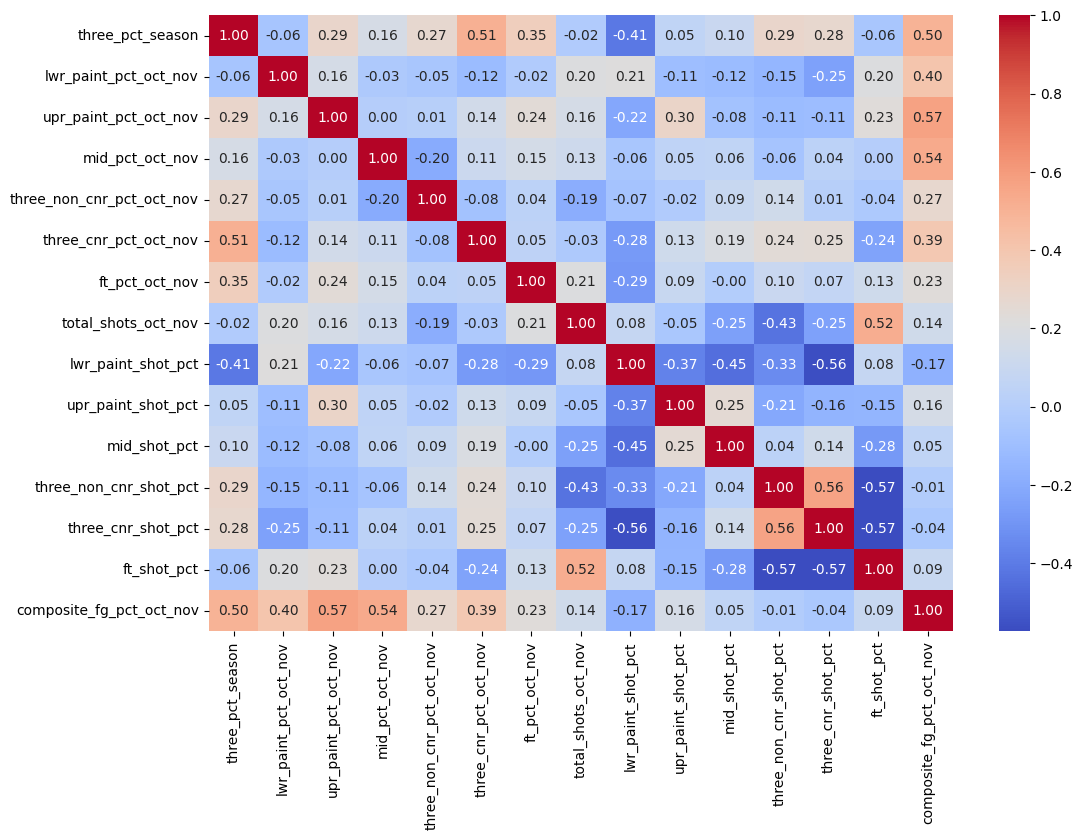

In [ ]:
corr_matrix = nba.corr()
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Show the plot
plt.show()


# **Exploratory Data Analysis**

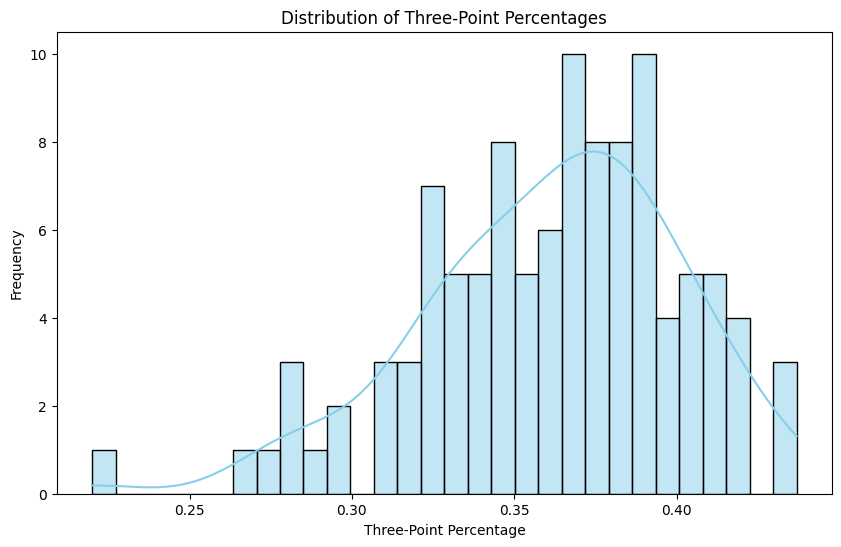

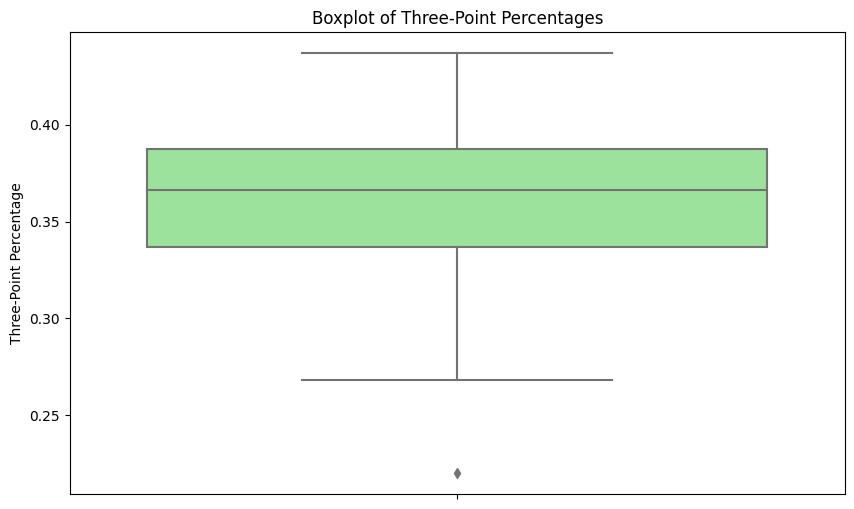

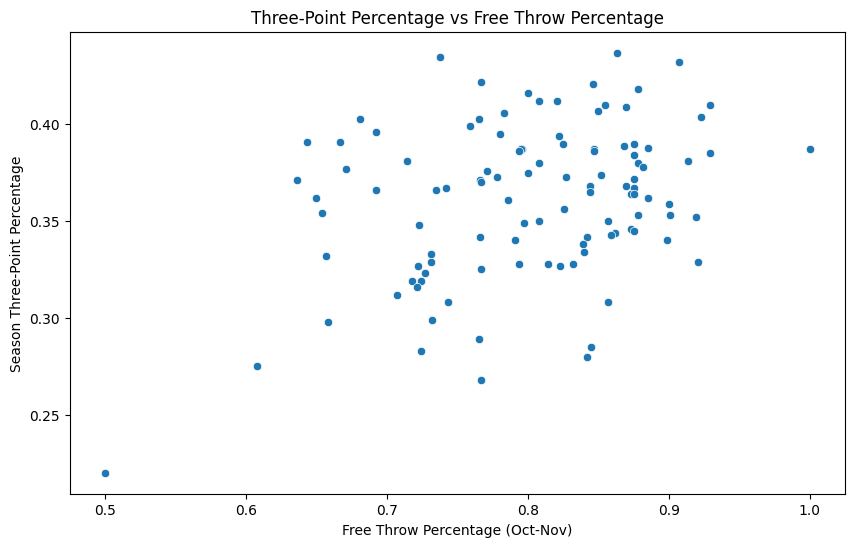

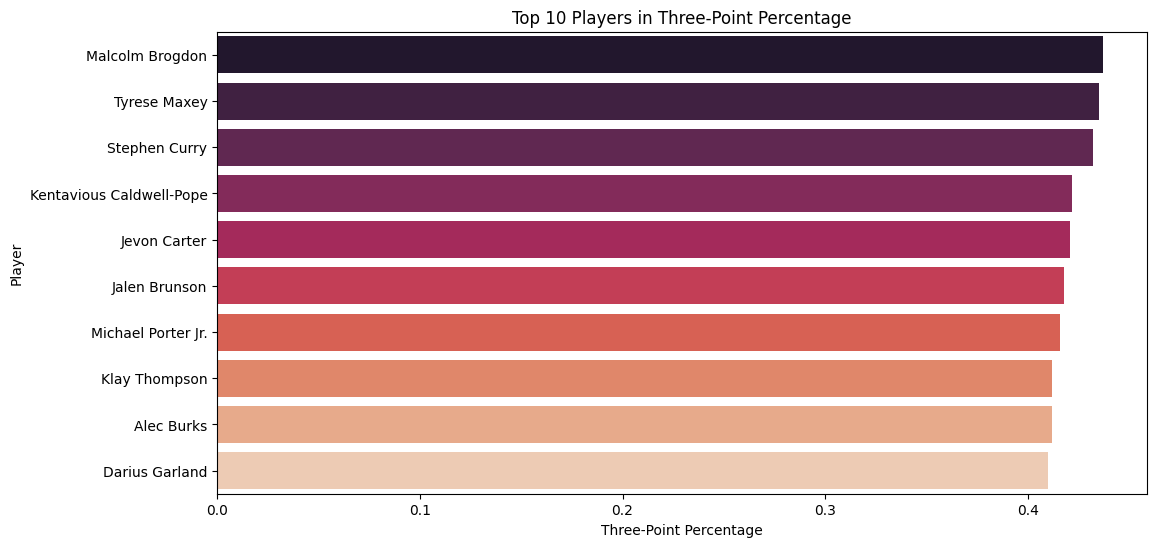

In [ ]:
# Histogram of Three-Point Percentages
plt.figure(figsize=(10, 6))
sns.histplot(nba['three_pct_season'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Three-Point Percentages')
plt.xlabel('Three-Point Percentage')
plt.ylabel('Frequency')
plt.show()

# Boxplot of Three-Point Percentages
plt.figure(figsize=(10, 6))
sns.boxplot(y=nba['three_pct_season'], color='lightgreen')
plt.title('Boxplot of Three-Point Percentages')
plt.ylabel('Three-Point Percentage')
plt.show()


# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ft_pct_oct_nov', y='three_pct_season', data=nba)
plt.title("Three-Point Percentage vs Free Throw Percentage")
plt.xlabel("Free Throw Percentage (Oct-Nov)")
plt.ylabel("Season Three-Point Percentage")
plt.show()

# Bar Plot for Top Players
top_n = 10
top_players = nba.nlargest(top_n, 'three_pct_season')[['Name', 'three_pct_season']]
plt.figure(figsize=(12, 6))
sns.barplot(x='three_pct_season', y='Name', data=top_players, palette="rocket")
plt.title(f"Top {top_n} Players in Three-Point Percentage")
plt.xlabel("Three-Point Percentage")
plt.ylabel("Player")
plt.show()


In [ ]:
nba.isna().sum()

Name                         0
three_pct_season             0
lwr_paint_pct_oct_nov        0
upr_paint_pct_oct_nov        0
mid_pct_oct_nov              0
three_non_cnr_pct_oct_nov    0
three_cnr_pct_oct_nov        0
ft_pct_oct_nov               0
total_shots_oct_nov          0
lwr_paint_shot_pct           0
upr_paint_shot_pct           0
mid_shot_pct                 0
three_non_cnr_shot_pct       0
three_cnr_shot_pct           0
ft_shot_pct                  0
composite_fg_pct_oct_nov     0
dtype: int64

**Fit the linear model (Using all the variables, looking for p-value)**

In [ ]:
# Define features and target variable for modeling
X = nba.drop(['three_pct_season', 'Name'], axis=1)
y = nba['three_pct_season']

# Add a constant to the model (for intercept)
X = sm.add_constant(X)

# Create and fit the model
model_all = sm.OLS(y, X).fit()

# Summary of the model
model_summary = model_all.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       three_pct_season   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     9.371
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           1.08e-11
Time:                        22:46:42   Log-Likelihood:                 238.09
No. Observations:                 108   AIC:                            -450.2
Df Residuals:                      95   BIC:                            -415.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0790      0.037      2.130      0.036       0.005       0.153
lwr_paint_pct_oct_nov        -0.0041      0.034     -0.119      0.905      -0.072       0.064
upr_paint_pct_oct_nov         0.0509      0.035      1.459      0.148      -0.018       0.120
mid_pct_oct_nov               0.0319      0.023      1.385      0.169      -0.014       0.078
three_non_cnr_pct_oct_nov     0.1190      0.032      3.773      0.000       0.056       0.182
three_cnr_pct_oct_nov         0.2386      0.043      5.531      0.000       0.153       0.324
ft_pct_oct_nov                0.0936      0.037      2.545      0.013       0.021       0.167
total_shots_oct_nov       -1.045e-05   2.94e-05     -0.356      0.723   -6.87e-05    4.78e-05
lwr_paint_shot_pct           -0.0556      0.032     -1.717      0.089      -0.120       0.009
upr_paint_shot_pct           -0.0358      0.052     -0.690      0.492      -0.139       0.067
mid_shot_pct                 -0.0406      0.079     -0.514      0.609      -0.197       0.116
three_non_cnr_shot_pct        0.0950      0.079      1.206      0.231      -0.061       0.251
three_cnr_shot_pct            0.0557      0.052      1.078      0.284      -0.047       0.158
ft_shot_pct                   0.0603      0.041      1.474      0.144      -0.021       0.141
composite_fg_pct_oct_nov      0.0873      0.013      6.875      0.000       0.062       0.112
==============================================================================
Omnibus:                        2.820   Durbin-Watson:                   1.169
Prob(Omnibus):                  0.244   Jarque-Bera (JB):                2.303
Skew:                          -0.343   Prob(JB):                        0.316
Kurtosis:                       3.203   Cond. No.                     1.43e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.15e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Linear Regression with All Variables**

In [ ]:
# Define X (features) and y (target)
X = nba.drop(['three_pct_season', 'Name'], axis=1)
y = nba['three_pct_season']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

# Create and fit the LinearRegression model with all features
model_all = LinearRegression()
model_all.fit(X_train, y_train)

# Predictions using the model with all features
y_pred_all = model_all.predict(X_test)

# Calculate R-squared, MAE, MSE, and RMSE for the model with all features
r2_all = r2_score(y_test, y_pred_all)
mae_all = mean_absolute_error(y_test, y_pred_all)
mse_all = mean_squared_error(y_test, y_pred_all)
rmse_all = np.sqrt(mse_all)

# Print the performance metrics for the model with all features
print("Model with All Features:")
print(f"R-squared: {r2_all}")
print(f"Mean Absolute Error (MAE): {mae_all}")
print(f"Mean Squared Error (MSE): {mse_all}")
print(f"Root Mean Squared Error (RMSE): {rmse_all}")


Model with All Features:
R-squared: 0.5900335279875881
Mean Absolute Error (MAE): 0.025079967336161895
Mean Squared Error (MSE): 0.0010249587371042488
Root Mean Squared Error (RMSE): 0.032014976762513025



 **Linear Regression With Selected Variables**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd


# Define X (features) and y (target)
X = nba.drop('three_pct_season', axis=1)
y = nba['three_pct_season']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

# Using only the statistically significant variables
significant_features = ['three_non_cnr_pct_oct_nov', 'three_cnr_pct_oct_nov',
                        'ft_pct_oct_nov','composite_fg_pct_oct_nov']

# Training with only significant features
X_train_significant = X_train[significant_features]
X_test_significant = X_test[significant_features]

# Create and fit the LinearRegression model
model_significant = LinearRegression()
model_significant.fit(X_train_significant, y_train)

# Now we can make predictions with the model using these significant features
y_pred = model_significant.predict(X_test_significant)

# Calculate R-squared, MAE, MSE, and RMSE
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


# Print the performance metrics
print(f"R-squared: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


R-squared: 0.5767374425146391
Mean Absolute Error (MAE): 0.02396384749022367
Mean Squared Error (MSE): 0.0010582003310031067
Root Mean Squared Error (RMSE): 0.032529991254273444


**Regression Tree**

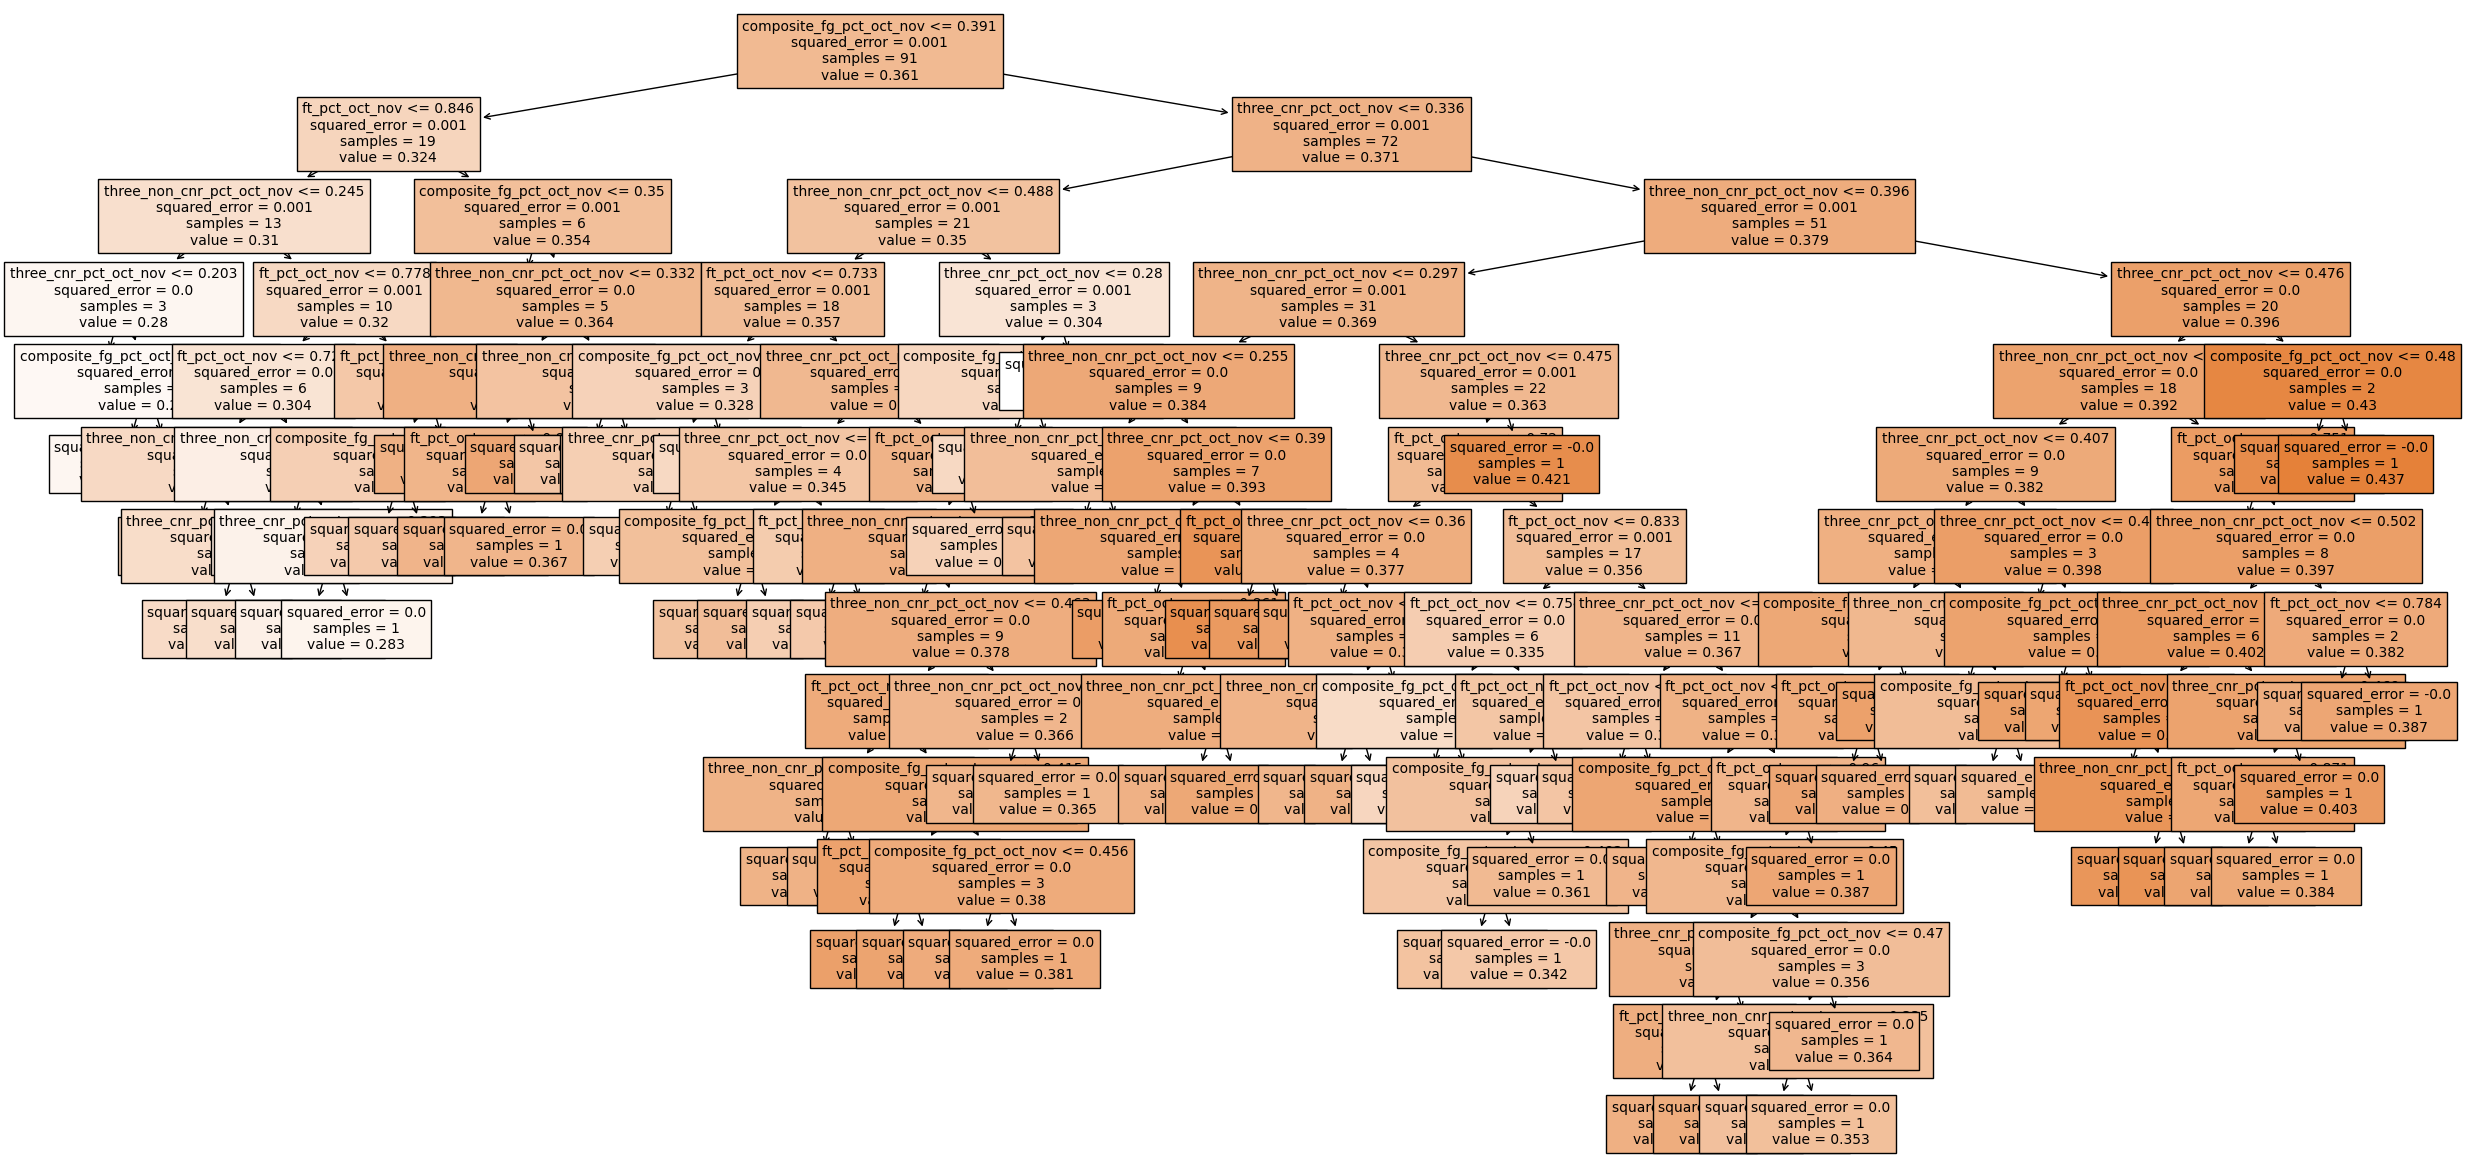

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
# Define X (features) and y (target)
X = nba.drop('three_pct_season', axis=1)
y = nba['three_pct_season']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

# Using only the statistically significant variables
significant_features = ['three_non_cnr_pct_oct_nov', 'three_cnr_pct_oct_nov',
                        'ft_pct_oct_nov','composite_fg_pct_oct_nov']

# Training with only significant features
X_train_significant = X_train[significant_features]

# Training a Decision Tree Regressor with only significant features
tree_model = DecisionTreeRegressor(random_state=0)
tree_model.fit(X_train_significant, y_train)

# Plot Decision Tree
plt.figure(figsize=(30, 15))
plot_tree(tree_model, feature_names=significant_features, filled=True, fontsize=10)
plt.show()

**Prediction**

In [ ]:
# Prepare DataFrame with predictions
nba_with_name = nba[['Name', 'three_pct_season']].copy()
nba_with_name['Predicted with All Features'] = model_all.predict(X)
nba_with_name['Predicted with Significant Features'] = model_significant.predict(X[significant_features])

# Now 'nba_with_name' contains the names, actual percentages, and both sets of predictions
nba_with_name.head(10)


,Name,three_pct_season,Predicted with All Features,Predicted with Significant Features
0,Malcolm Brogdon,0.437,0.436590,0.425174
1,Tyrese Maxey,0.435,0.375581,0.376420
2,Stephen Curry,0.432,0.425879,0.419826
3,Kentavious Caldwell-Pope,0.422,0.400500,0.399798
4,Jevon Carter,0.421,0.390141,0.390565
5,Jalen Brunson,0.418,0.362523,0.368764
6,Michael Porter Jr.,0.416,0.384357,0.376708
7,Klay Thompson,0.412,0.382750,0.366401
8,Alec Burks,0.412,0.397894,0.376974
9,Darius Garland,0.410,0.392378,0.384823
